In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train_bigmart.csv')

In [3]:
test_data = pd.read_csv('test_bigmart.csv')

In [4]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

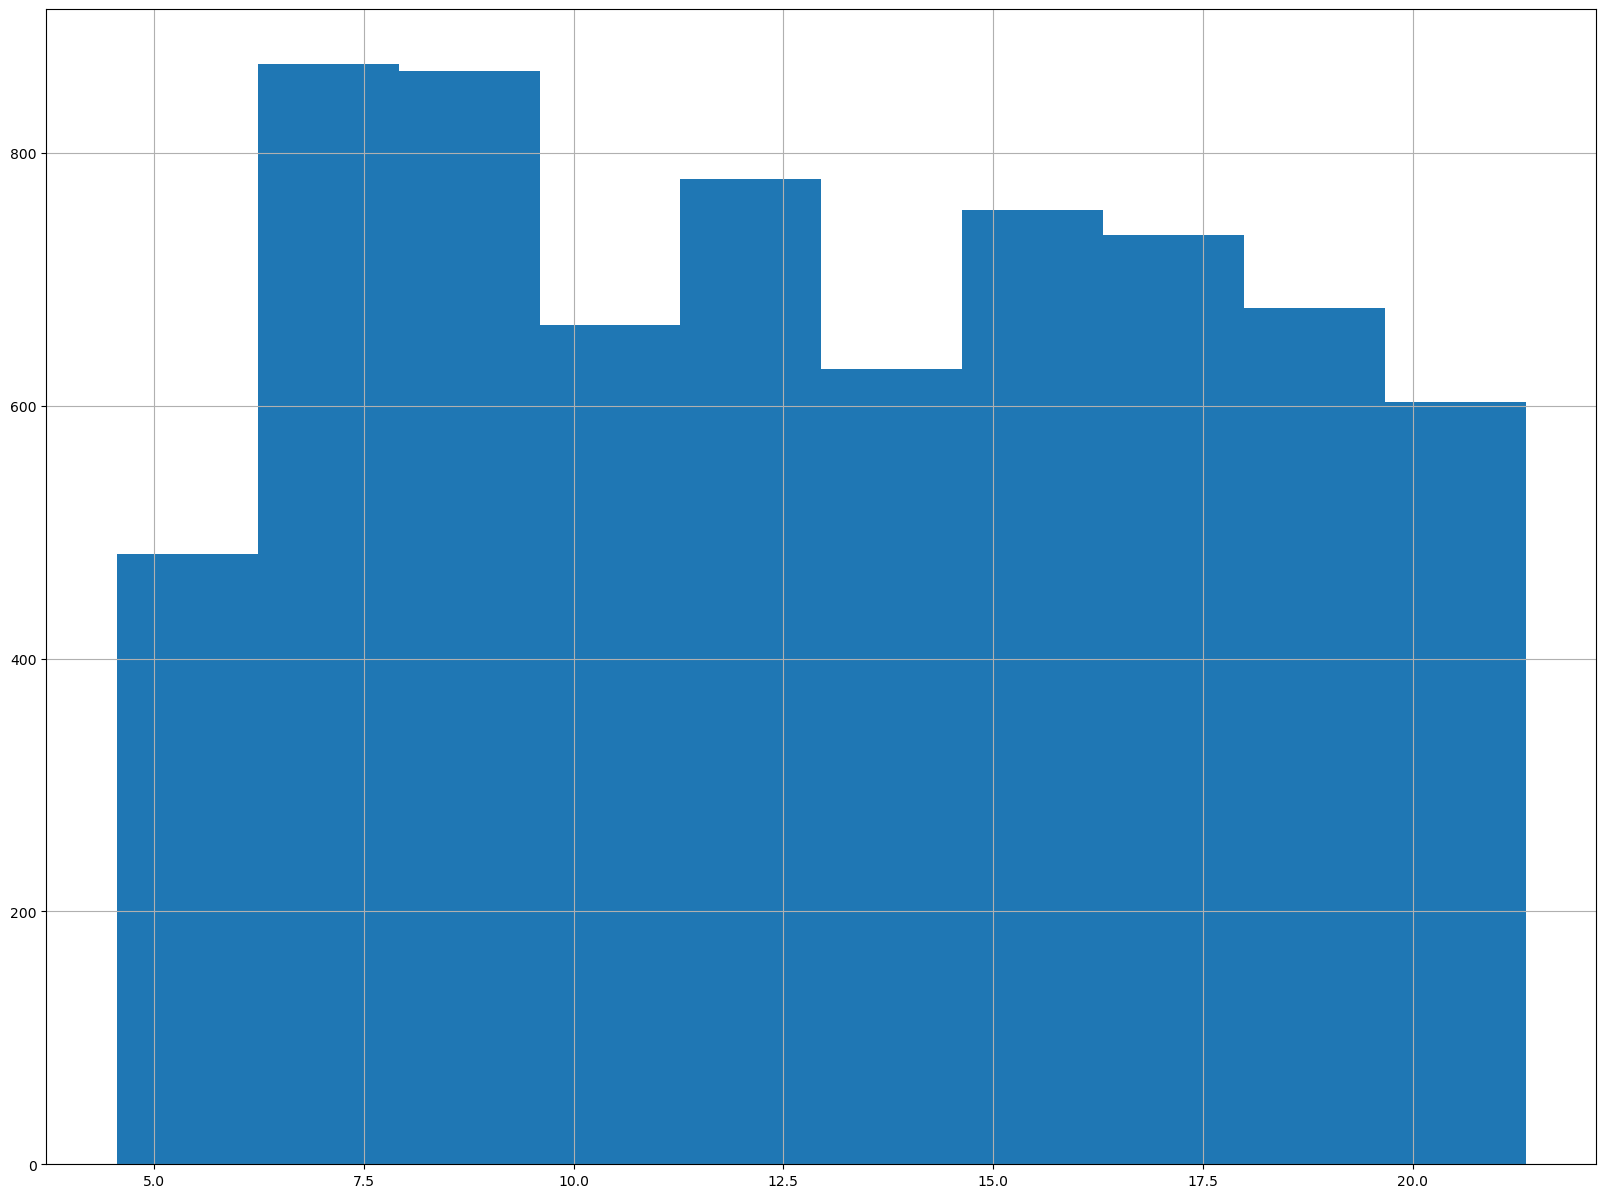

In [10]:
train_data['Item_Weight'].hist(figsize=(20, 15))
plt.show()

In [11]:
# fill null values using the mean
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
# fill null values using the mean
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
# identify the outlet size based on outlet type
Outlet_Size_mode_value = train_data.pivot_table(values='Outlet_Size',
                                                      columns='Outlet_Type',
                                                      aggfunc=lambda x: x.mode())

Outlet_Size_mode_value

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
# fill missing values using the mode of outlet type
missing_outlet_sizes = train_data['Outlet_Size'].isnull()

train_data.loc[missing_outlet_sizes, 'Outlet_Size'] = train_data.loc[missing_outlet_sizes, 'Outlet_Type'].apply(lambda x: Outlet_Size_mode_value[x].Outlet_Size)

In [16]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
# identify the outlet size based on outlet type
Outlet_Size_mode_value = test_data.pivot_table(values='Outlet_Size',
                                                      columns='Outlet_Type',
                                                      aggfunc=lambda x: x.mode())

Outlet_Size_mode_value

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
# fill missing values using the mode of outlet type
missing_outlet_sizes = test_data['Outlet_Size'].isnull()

test_data.loc[missing_outlet_sizes, 'Outlet_Size'] = test_data.loc[missing_outlet_sizes, 'Outlet_Type'].apply(lambda x: Outlet_Size_mode_value[x].Outlet_Size)

In [19]:
sum(train_data['Item_Visibility'] == 0)

526

In [20]:
# replace 0s with the mean
train_data.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value=train_data['Item_Visibility'].mean(),
                                            inplace=True)

In [21]:
sum(train_data['Item_Visibility'] == 0)

0

In [22]:
sum(test_data['Item_Visibility'] == 0)

353

In [23]:
# replace 0s with the mean
test_data.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value=test_data['Item_Visibility'].mean(),
                                            inplace=True)

In [24]:
sum(test_data['Item_Visibility'] == 0)

0

In [25]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
# replace the repetitive values
train_data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [28]:
# replace the repetitive values
test_data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [29]:
# create a new feature using the two first letters of the item_identifier
train_data['Item_Category'] = train_data['Item_Identifier'].apply(lambda x: x[:2])
train_data['Item_Category'] = train_data['Item_Category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
train_data['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Category, dtype: int64

In [30]:
# create a new feature using the two first letters of the item_identifier
test_data['Item_Category'] = test_data['Item_Identifier'].apply(lambda x: x[:2])
test_data['Item_Category'] = test_data['Item_Category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
test_data['Item_Category'].value_counts()

Food              4076
Non-Consumable    1087
Drink              518
Name: Item_Category, dtype: int64

In [31]:
# adding a new item item_fat_content category for non-consumable items
train_data.loc[train_data['Item_Category'] == 'Non-Consumable', 'Item_Fat_Content'] = 'No Edible'
train_data['Item_Fat_Content'].value_counts()

Low Fat      3918
Regular      3006
No Edible    1599
Name: Item_Fat_Content, dtype: int64

In [32]:
# adding a new item item_fat_content category for non-consumable items
test_data.loc[test_data['Item_Category'] == 'Non-Consumable', 'Item_Fat_Content'] = 'No Edible'
test_data['Item_Fat_Content'].value_counts()

Low Fat      2581
Regular      2013
No Edible    1087
Name: Item_Fat_Content, dtype: int64

In [33]:
train_data['Outlet_Years'] = 2013 - train_data['Outlet_Establishment_Year']
train_data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [34]:
test_data['Outlet_Years'] = 2013 - test_data['Outlet_Establishment_Year']
test_data['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

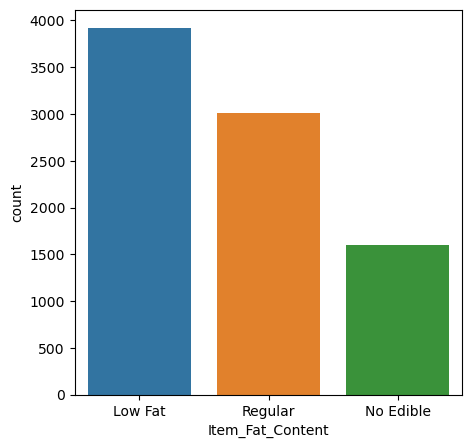

In [35]:
# plot item_fat_content
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.show()

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

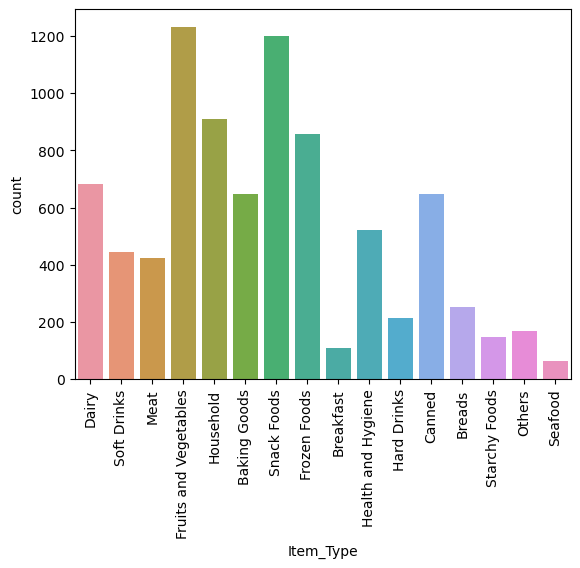

In [36]:
# plot item_type
labels = list(train_data['Item_Type'].unique())
chart = sns.countplot(x=train_data['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

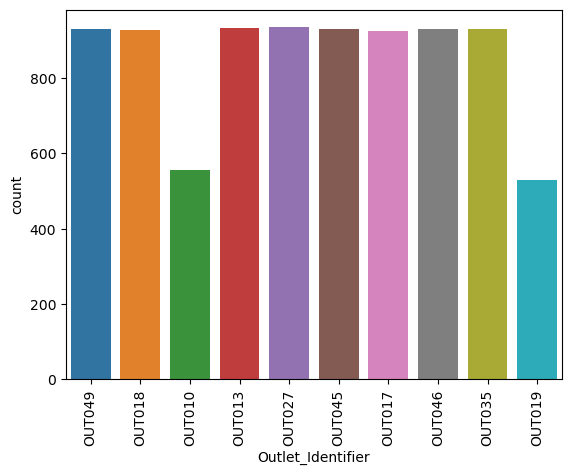

In [37]:
# plot outlet_identifier
labels = list(train_data['Outlet_Identifier'].unique())
chart = sns.countplot(x=train_data['Outlet_Identifier'])
chart.set_xticklabels(labels=labels, rotation=90)

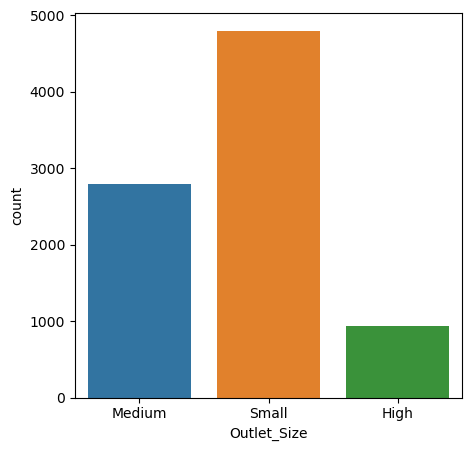

In [38]:
# plot outlet_size
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=train_data)
plt.show()

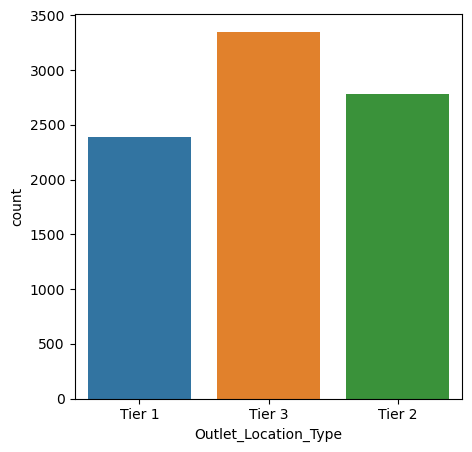

In [39]:
# plot outlet_location_type
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type', data=train_data)
plt.show()

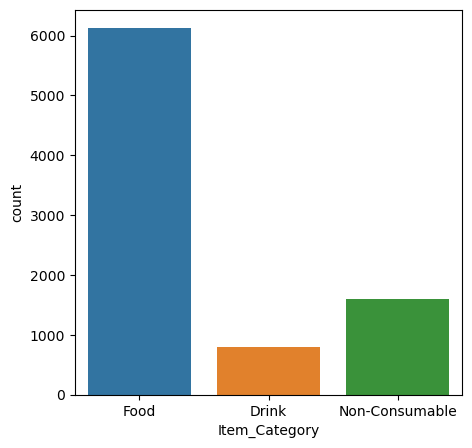

In [40]:
# plot item_category
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Category', data=train_data)
plt.show()

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>,
        <Axes: title={'center': 'Outlet_Years'}>]], dtype=object)

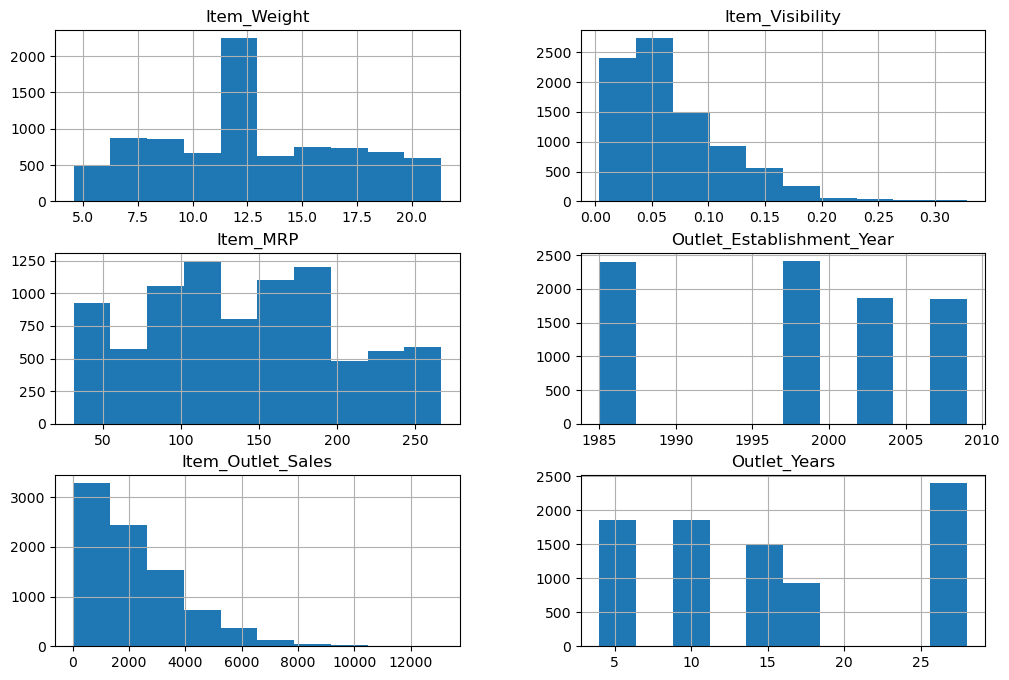

In [41]:
# data distribution of numerical values
train_data.hist(figsize=(12,8))

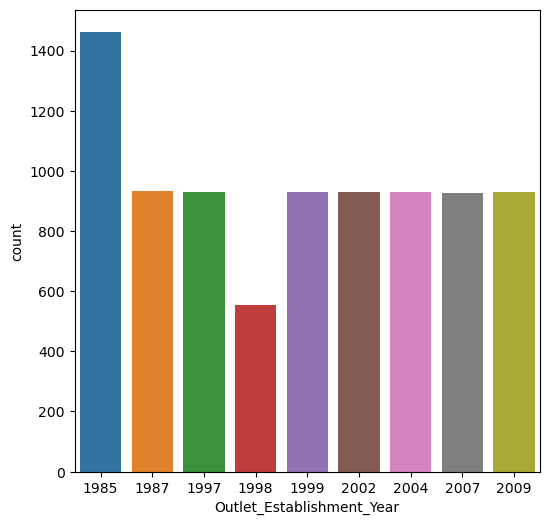

In [42]:
# outlet_establishment_year column count
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.show()

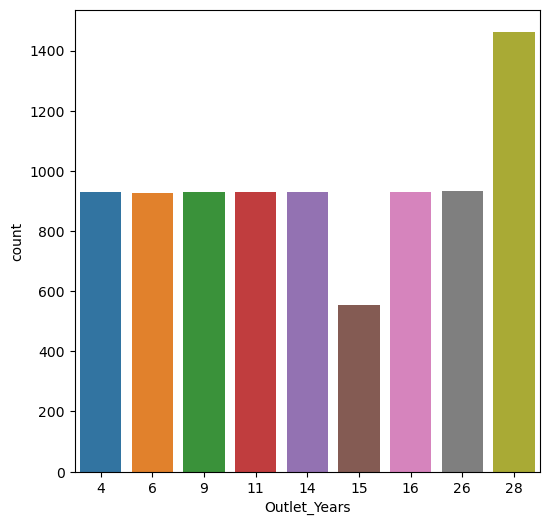

In [43]:
# outlet_years column count
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Years', data=train_data)
plt.show()

In [44]:
# correlation with the target column
corr_matrix = train_data.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

/var/folders/bp/m_7fzmbx53g25cj3x37b2msm0000gn/T/ipykernel_33240/1447136396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Years                 0.049135
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.134138
Name: Item_Outlet_Sales, dtype: float64

<Axes: >

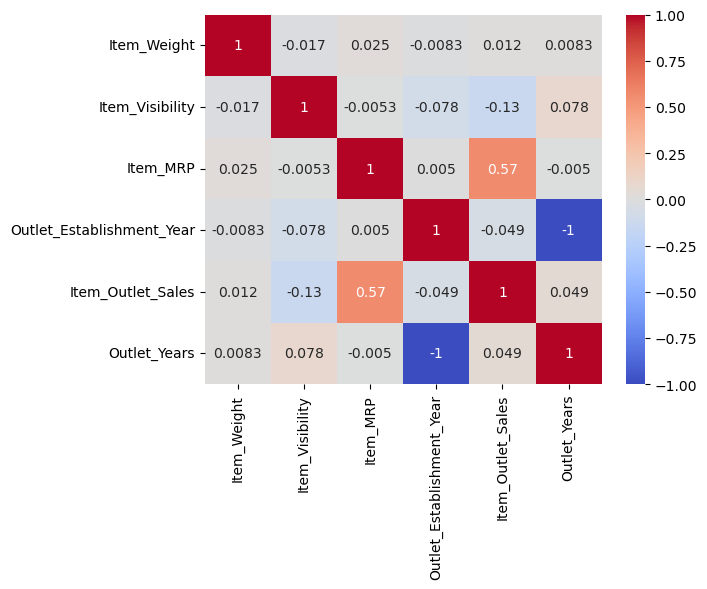

In [45]:
# plot correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

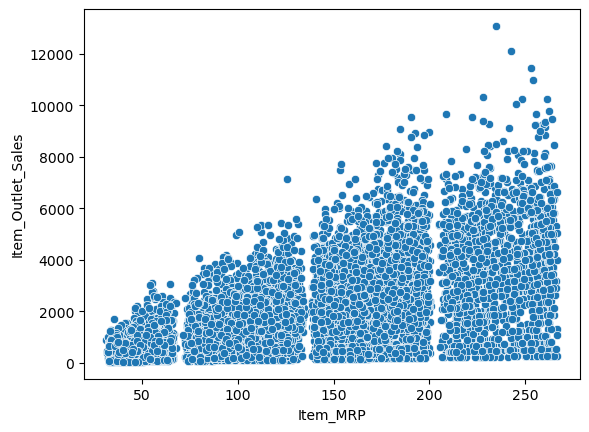

In [46]:
# scatter plot of item_mrp and item_outlet_sales
sns.scatterplot(data=train_data, x='Item_MRP', y='Item_Outlet_Sales')

In [47]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,No Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
cols = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']

for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

In [50]:
# applying one-hot encoding to some features
train_data = pd.get_dummies(train_data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'])

In [51]:
# applying one-hot encoding to some features
test_data = pd.get_dummies(test_data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'])

In [52]:
# how the data looks like
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.066132,6,182.0950,0,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.066132,9,53.8614,1,1987,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


In [53]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_No Edible,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,1103,20.750000,0.007565,13,107.8622,9,1999,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,1067,8.300000,0.038428,4,87.3198,2,2007,6,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1406,14.600000,0.099575,11,241.7538,0,1998,15,0,1,...,0,0,1,1,0,0,0,0,0,1
3,809,7.315000,0.015388,13,155.0340,2,2007,6,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1184,12.695633,0.118599,4,234.2300,5,1985,28,0,0,...,0,0,1,0,0,0,1,0,1,0


In [54]:
# setting model input and target variables
X = train_data.drop(columns=['Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']

In [55]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [56]:
def train_and_predict_model(model_name, model, X, y):
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create a training pipeline
   # pipeline = make_pipeline(StandardScaler(), model)
    
    # apply scaling on training data and train the model
    model.fit(X_train, y_train)
    
    # predict the validation set
    y_pred = model.predict(X_test)
    
    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_score = r2_score(y_test, y_pred)
    
    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [58]:
# linear regression
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
train_and_predict_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1067.264280126782
R2 Score:  0.580917737974793


In [59]:
# svm
from sklearn.svm import SVR
svr_model = SVR()
train_and_predict_model('SVM', svr_model, X, y)

----------------------------------
SVM  Report:
----------------------------------
RMSE:  1662.4371758633283
R2 Score:  -0.016824062059166423


In [60]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
train_and_predict_model('Decision Tree', dtr_model, X, y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  1504.1809427082314
R2 Score:  0.16755510437868226


In [61]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
train_and_predict_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1094.898099484267
R2 Score:  0.5589348598873622


In [62]:
# xgboost
from xgboost import XGBRegressor
xgbr_model = XGBRegressor()
train_and_predict_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1129.3487773626427
R2 Score:  0.5307421974230476


In [63]:
# display model scores
model_scores

,model,rmse,r2_score
0,Linear Regression,1067.264280,0.580918
1,SVM,1662.437176,-0.016824
2,Decision Tree,1504.180943,0.167555
3,Random Forest,1094.898099,0.558935
4,XGBoost,1129.348777,0.530742


In [64]:
linear_regression_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression_model.fit(X_train, y_train)
# predict the validation set
y_pred = linear_regression_model.predict(X_test)

y_pred

array([1360.93969998,  687.42613731,  827.39507567, ...,  798.09471825,
        602.78901062, 1698.22765517])

In [65]:
y_pred.shape

(1705,)

In [ ]:
# train a Linear Regression model with all the data
#model_pipeline = make_pipeline(StandardScaler(), LinearRegression())
#model_pipeline.fit(X, y)


In [66]:
test_data.shape

(5681, 24)

In [67]:

# drop unnecessary features
test_data = test_data.drop(columns=['Outlet_Establishment_Year'])


In [68]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.066132,6,182.0950,0,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.066132,9,53.8614,1,1987,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


In [69]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_No Edible,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,1103,20.750000,0.007565,13,107.8622,9,14,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1067,8.300000,0.038428,4,87.3198,2,6,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,1406,14.600000,0.099575,11,241.7538,0,15,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,809,7.315000,0.015388,13,155.0340,2,6,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1184,12.695633,0.118599,4,234.2300,5,28,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [71]:
# predict the testing data
#linear_regression_model = LinearRegression()
#linear_regression_model.fit(X_train, y_train)
# predict the validation set
#linear_regression_model.fit(X, y)
y_pred = linear_regression_model.predict(test_data)


y_pred

array([1870.1449609 , 1575.4085287 , 1881.6541165 , ..., 1850.22060181,
       3510.96048983, 1298.98659514])

In [72]:
y_pred.shape

(5681,)

In [73]:
sample = pd.read_csv('sample_submission_bigmart.csv')

In [74]:
sample.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')

In [75]:
sample['Item_Outlet_Sales'] = y_pred

In [76]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1870.144961
1,FDW14,OUT017,1575.408529
2,NCN55,OUT010,1881.654117
3,FDQ58,OUT017,2595.447289
4,FDY38,OUT027,5206.279782
...,...,...,...
5676,FDB58,OUT046,2281.640719
5677,FDD47,OUT018,2427.245653
5678,NCO17,OUT045,1850.220602
5679,FDJ26,OUT017,3510.960490


In [77]:
sample.to_csv('test_predict.csv', index=False)

In [78]:
pred_test = pd.read_csv('test_predict.csv')

In [79]:
pred_test

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1870.144961
1,FDW14,OUT017,1575.408529
2,NCN55,OUT010,1881.654117
3,FDQ58,OUT017,2595.447289
4,FDY38,OUT027,5206.279782
...,...,...,...
5676,FDB58,OUT046,2281.640719
5677,FDD47,OUT018,2427.245653
5678,NCO17,OUT045,1850.220602
5679,FDJ26,OUT017,3510.960490
